In [1]:
import os
import sys
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import torch
from torchvision import transforms

load_dotenv()

sys.path.append(os.path.abspath(os.path.join("..")))
from src.captchadataset import CaptchaDataset  # noqa: E402

In [2]:
captcha_transformation = transforms.Compose(
    [
        transforms.Grayscale(num_output_channels=1),
        transforms.RandomInvert(p=0.5),
        transforms.ToTensor(),
    ]
)
dataset = CaptchaDataset(os.environ["DATA_ROOT_DIR"], transform=captcha_transformation)

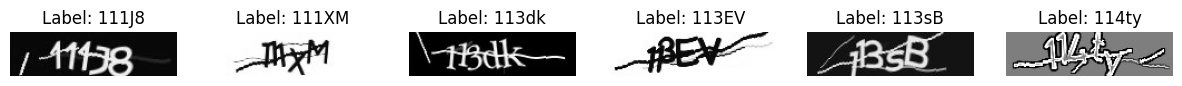

In [11]:
def visualize_samples_gray(dataset, num_samples=6):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

    for i in range(num_samples):
        img, label_tensor = dataset[i]
        label_str = "".join([dataset.idx_to_char[idx.item()] for idx in label_tensor])

        if torch.is_tensor(img):
            # Squeeze removes the channel dimension: (1, H, W) -> (H, W)
            img = img.squeeze()

        # cmap="gray" ensures matplotlib doesn't use the default "viridis" (purple/yellow)
        axes[i].imshow(img, cmap="gray")
        axes[i].set_title(f"Label: {label_str}")
        axes[i].axis("off")
    plt.show()


visualize_samples_gray(dataset)